In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./phone_usage_cleaned.csv')
df = df.drop(['Unnamed: 0', 'User ID', 'Phone Brand', 'Location', 'OS', 'Age','Gender'], axis = 1)
df.head()

,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
link_method = linkage(df.iloc[:,1:9], method = 'average')

In [ ]:

lablelist = np.arange(1, 5, 1)
lablelist.shape

(4,)

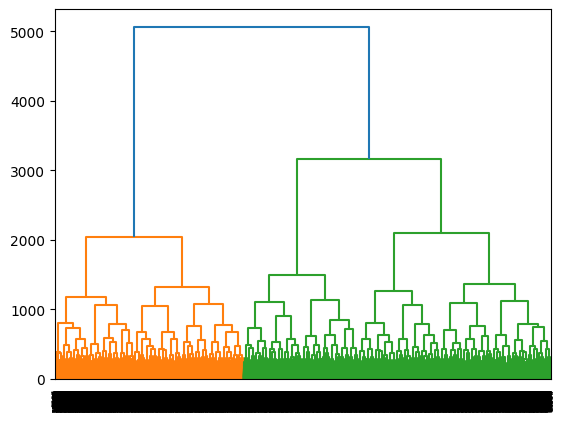

In [34]:
dend = dendrogram(link_method)

In [33]:
link_method.shape

(17685, 4)

In [19]:
from scipy.cluster.hierarchy import fcluster

In [21]:

clusters = fcluster(link_method, 5, criterion='maxclust')
clusters

array([5, 3, 4, ..., 3, 4, 3], dtype=int32)

In [22]:
df['Cluster'] = clusters

In [23]:
df.head(10)

,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Cluster
0,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,5
1,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,3
2,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,4
3,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,5
4,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,5
5,5.4,10.6,210.6,25,4.2,6285,0.6,4.8,1749,Entertainment,1
6,6.0,35.2,154.5,123,0.8,2653,2.9,2.3,1073,Social Media,4
7,3.1,43.5,125.3,188,2.3,9767,5.2,5.0,1136,Entertainment,2
8,5.3,46.4,21.3,194,3.7,2870,6.1,2.8,1253,Entertainment,4
9,9.9,10.6,180.2,84,4.8,9193,7.6,0.4,168,Education,2


In [26]:
df.groupby('Cluster')['Primary Use'].value_counts()

Cluster  Primary Use  
1        Social Media     576
         Work             569
         Gaming           568
         Education        564
         Entertainment    557
2        Entertainment    810
         Gaming           794
         Education        790
         Work             773
         Social Media     736
3        Work             852
         Education        840
         Gaming           836
         Social Media     809
         Entertainment    773
4        Education        610
         Social Media     591
         Work             583
         Gaming           572
         Entertainment    570
5        Gaming           806
         Education        797
         Social Media     789
         Work             780
         Entertainment    741
Name: count, dtype: int64

<Axes: xlabel='Cluster'>

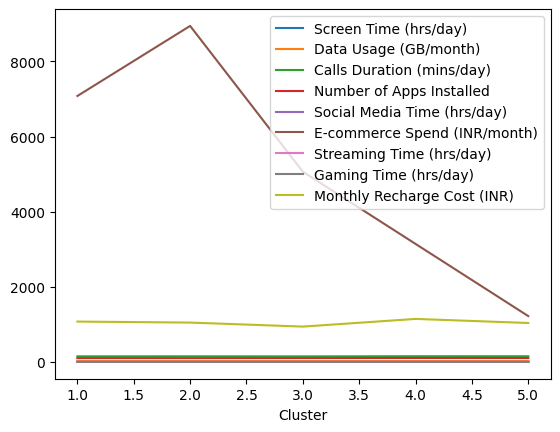

In [39]:
df1 = df.drop('Primary Use', axis = 1)

df1.groupby('Cluster').mean().plot(kind = 'line')

In [40]:
df1.groupby('Cluster').mean()

,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
Cluster,,,,,,,,,
1,6.517255,25.597424,150.793119,103.740649,3.239520,7080.633380,4.190014,2.488426,1076.453070
2,6.569792,25.358340,151.275634,103.062772,3.256111,8945.109147,4.272893,2.499744,1049.531386
3,6.513236,25.180316,149.273236,104.435280,3.224745,5064.018248,4.211995,2.510779,942.824331
4,6.586364,25.562850,153.652119,106.686603,3.250786,3142.947027,4.296343,2.476828,1147.041353
5,6.549016,25.458421,152.539790,105.300026,3.288142,1221.649629,4.278661,2.473396,1038.707386


In [41]:
df.Cluster.value_counts()

Cluster
3    4110
5    3913
2    3903
4    2926
1    2834
Name: count, dtype: int64

In [44]:
from scipy.stats import zscore
df1 = df.drop('Primary Use', axis = 1)
df2 = df1.apply(zscore)

In [62]:
link_method = linkage(df2.iloc[:,1:9], method = 'average')

In [66]:
link_method = linkage(df.iloc[:,1:9], method = 'average')
clusters1 = fcluster(link_method, 5, criterion='maxclust')
clusters2 = fcluster(link_method, 10, criterion='distance')


In [67]:
clusters1

array([5, 3, 4, ..., 3, 4, 3], dtype=int32)

In [64]:
clusters2

array([14879,  7271, 12701, ...,  9037, 13116, 10636], dtype=int32)

In [49]:
clusters1 = fcluster(link_method, 2, criterion='maxclust')

<Axes: xlabel='Cluster'>

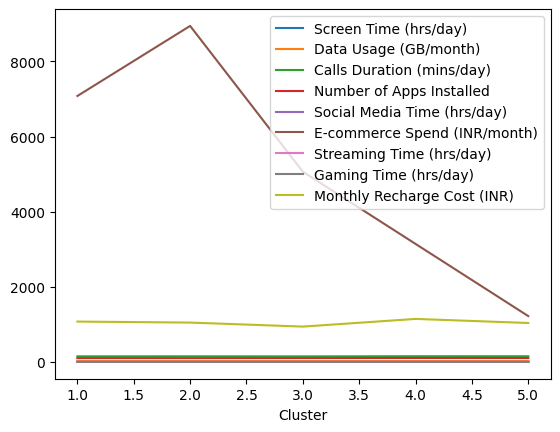

In [68]:
df['Cluster'] = clusters1
dff1 = df.drop('Primary Use', axis = 1)

dff1.groupby('Cluster').mean().plot(kind = 'line')

In [69]:
dff1.groupby('Cluster').mean()

,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
Cluster,,,,,,,,,
1,6.517255,25.597424,150.793119,103.740649,3.239520,7080.633380,4.190014,2.488426,1076.453070
2,6.569792,25.358340,151.275634,103.062772,3.256111,8945.109147,4.272893,2.499744,1049.531386
3,6.513236,25.180316,149.273236,104.435280,3.224745,5064.018248,4.211995,2.510779,942.824331
4,6.586364,25.562850,153.652119,106.686603,3.250786,3142.947027,4.296343,2.476828,1147.041353
5,6.549016,25.458421,152.539790,105.300026,3.288142,1221.649629,4.278661,2.473396,1038.707386


<Axes: xlabel='Cluster'>

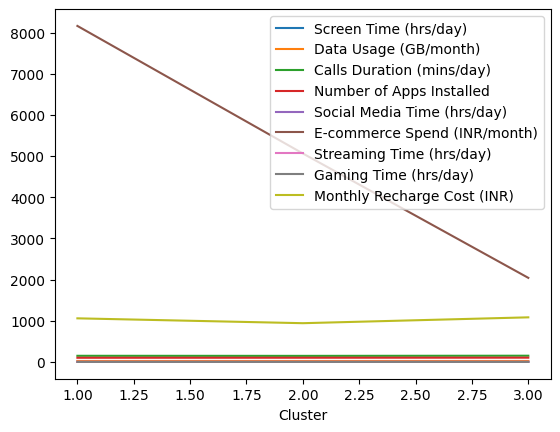

In [70]:
clusters4 = fcluster(link_method, 3, criterion='maxclust')
df['Cluster'] = clusters4
dff1 = df.drop('Primary Use', axis = 1)

dff1.groupby('Cluster').mean().plot(kind = 'line')

In [71]:
dff1.groupby('Cluster').mean()

,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
Cluster,,,,,,,,,
1,6.547692,25.458913,151.072658,103.347929,3.249132,8160.795013,4.238029,2.494983,1060.856316
2,6.513236,25.180316,149.273236,104.435280,3.224745,5064.018248,4.211995,2.510779,942.824331
3,6.564995,25.503100,153.015689,105.893259,3.272160,2043.658137,4.286226,2.474865,1085.057026


3 clsuters looks optimal
All clusters have similer Screen Time, Social Media Time and Gaming Time  
Cluster 1 is spending more time on Call, have the least average number of apps installed and spends most on E-commerce  


Cluster 1 


<Axes: xlabel='Cluster'>

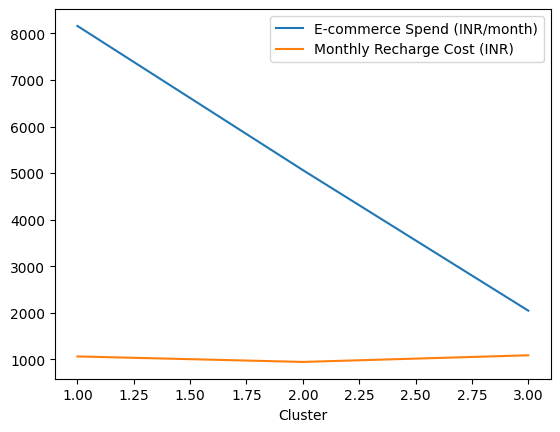

In [61]:
dff1.groupby('Cluster')[['E-commerce Spend (INR/month)', 'Monthly Recharge Cost (INR)']].mean().plot(kind = 'line')